This notebook contains code necessary to generate plots 9, 10 and 11 of Pessi *et al.*, 2024, *ELEPHANT: ExtragaLactic alErt Pipeline for Hostless AstroNomical Transients*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import requests
from matplotlib.colors import LinearSegmentedColormap
from astropy.visualization import simple_norm
import os
from copy import deepcopy
from astropy.time import Time
import io

os.chdir('/media/emille/git/COIN/CRP7/hostless/repository/extragalactic_hostless/src/')
from pipeline_utils import apply_median_stacking, resample_with_gaussian_kde

os.chdir('/media/emille/git/COIN/CRP7/hostless/repository/crp7_hostless/notebooks/')

In [2]:
colors={"orange":"#ED9145",
        "dark_brown":"#473832",
        "beige":"#E2D3C1",
        "rose":"#BC7E74",
        "dark_blue":"#21609D",
        "light_blue":"#5C92C1",
        "dark_gray":"#4D5966",
        "black":"#27242A",
        "light_gray":"#8999A1",
        "golden_brown":"#87581D"}

filters = ['zg', 'zr']
use_colors = ['dark_blue', 'orange']

cmap = LinearSegmentedColormap.from_list("", [colors['dark_blue'],
                                              colors['orange']])

In [18]:
# transfer cutout data

indx = 0

objid_pd = pd.DataFrame([['SN 2018bym', 'ZTF18aapgrxo'],
         ['SN 2022ann','ZTF22aaaihet'],
         ['SLSN 2018ibb', 'ZTF18acenqto']], columns=['iau_name', 'ztf_name'])

objid = objid_pd.iloc[indx]['iau_name']



r = requests.post(
  'https://fink-portal.org/api/v1/objects',
  json={
    'objectId': objid_pd.iloc[indx]['ztf_name'],
    'withcutouts': 'True'
  }
)

# Format output in a DataFrame
pdf = pd.read_json(io.BytesIO(r.content))

columns = [
    'b:cutoutScience_stampData',
    'b:cutoutTemplate_stampData'
]

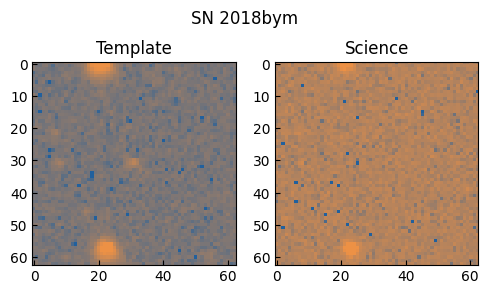

In [19]:

plt.figure(figsize=(5,5))
plt.suptitle(objid, x=0.5,y=0.775)

ax1 = plt.subplot(1,2,2)
plt.title('Science')

pdf2 = deepcopy(pdf[columns[0]])
flag_none = []
for i in range(pdf2.shape[0]):
    empty_pixels = np.array(pdf2.iloc[i]) == None
    n_empty_pixels = sum(empty_pixels.flatten())
    if n_empty_pixels == 0:
        flag_none.append(True)
    else:
        flag_none.append(False)

flag_none = np.array(flag_none)
pdf22 = pdf2[flag_none]

pdf222 = deepcopy(pdf22)
for i in range(pdf22.shape[0]):
    pdf222.iloc[i] = np.array(pdf22.iloc[0])

stack_sci = apply_median_stacking(pdf222, output_shape=[63,63])

norm = simple_norm(stack_sci, 'log', percent=99.)
plt.imshow(stack_sci, cmap=cmap, norm=norm)

ax1.tick_params(axis='both',direction='in')

ax2 = plt.subplot(1,2,1)
plt.title('Template')

pdf3 = deepcopy(pdf[columns[1]])
flag_none3 = []
for i in range(pdf3.shape[0]):
    empty_pixels3 = np.array(pdf3.iloc[i]) == None
    n_empty_pixels3 = sum(empty_pixels3.flatten())
    if n_empty_pixels3 == 0:
        flag_none3.append(True)
    else:
        flag_none3.append(False)

flag_none3 = np.array(flag_none3)
pdf33 = pdf3[flag_none3]

pdf333 = deepcopy(pdf33)
for i in range(pdf33.shape[0]):
    pdf333.iloc[i] = np.array(pdf33.iloc[0])

stack_temp = apply_median_stacking(pdf333, output_shape=[63,63])
norm = simple_norm(stack_temp, 'log', percent=99.)
plt.imshow(stack_temp, cmap=cmap, norm=norm)
ax2.tick_params(axis='both',direction='in')
plt.tight_layout()
plt.savefig(objid + 'stacked_stamps.pdf')